In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data = pd.read_csv("financial_risk_assessment.csv")
data

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [4]:
data.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [5]:
data.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [6]:
data = data.dropna()
data

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
10,42,Non-binary,Master's,Single,116212.0,707.0,24771.0,Home,Employed,11,Excellent,0.114134,212198.0,3.0,Matthewborough,NH,French Guiana,0.0,2,Medium
16,55,Male,High School,Married,70978.0,706.0,36970.0,Personal,Unemployed,19,Excellent,0.266941,54041.0,3.0,Christophermouth,MO,Tonga,1.0,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,49,Female,High School,Single,29734.0,652.0,44356.0,Home,Self-employed,13,Excellent,0.567928,78123.0,3.0,Lamberttown,ME,Guadeloupe,2.0,0,Low
14989,35,Female,Master's,Married,108652.0,682.0,21953.0,Home,Self-employed,9,Excellent,0.560202,208538.0,0.0,West Gwendolyn,GA,Liechtenstein,1.0,1,Low
14991,43,Male,Bachelor's,Married,110352.0,662.0,36790.0,Business,Self-employed,13,Good,0.474802,203890.0,2.0,New Catherine,RI,Cambodia,2.0,1,Low
14994,40,Male,High School,Married,43655.0,614.0,34565.0,Home,Unemployed,11,Poor,0.399901,32179.0,4.0,Curtismouth,IA,Uzbekistan,1.0,1,Low


In [7]:
data.isnull().sum()

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64

In [8]:
data.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,5716.000000,5716.000000,5716.000000,5716.000000,5716.000000,5716.000000,5716.000000,5716.0000,5716.000000,5716.000000
mean,43.581700,70190.358467,699.128062,27577.067880,9.432120,0.351541,160244.610217,2.0014,2.003324,0.987929
std,14.755688,29149.358714,56.860099,12970.758807,5.791336,0.143394,80588.634163,1.4194,1.428184,0.811355
min,18.000000,20014.000000,600.000000,5001.000000,0.000000,0.100135,20104.000000,0.0000,0.000000,0.000000
25%,31.000000,44492.750000,650.000000,16574.500000,4.000000,0.226891,90832.500000,1.0000,1.000000,0.000000
50%,43.000000,70443.000000,700.000000,27626.000000,9.000000,0.352976,160643.000000,2.0000,2.000000,1.000000
75%,56.000000,96003.750000,748.000000,38759.500000,15.000000,0.476168,229234.750000,3.0000,3.000000,2.000000
max,69.000000,119978.000000,799.000000,49978.000000,19.000000,0.599970,299999.000000,4.0000,4.000000,2.000000


/var/folders/7r/_94gpvx576q21zt9xzxvhls80000gn/T/ipykernel_70812/2447226213.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(data["Income"])


<Axes: xlabel='Income', ylabel='Density'>

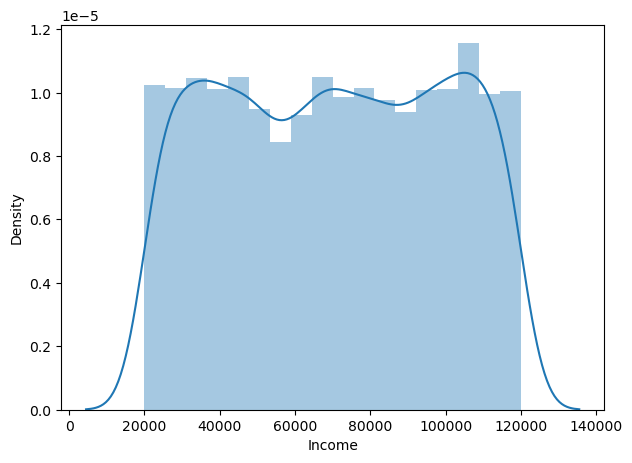

In [9]:
plt.figure(figsize=(7,5))
sbn.distplot(data["Income"])

In [11]:
y = data["Income"].values
x = data.drop("Income", axis=1).values

In [12]:
y

array([ 72799.,  55687.,  26508., ..., 110352.,  43655.,  46250.])

In [13]:
x

array([[4.9000e+01, 6.8800e+02, 4.5713e+04, ..., 0.0000e+00, 2.0000e+00,
        2.0000e+00],
       [2.1000e+01, 6.0000e+02, 3.6623e+04, ..., 3.0000e+00, 3.0000e+00,
        2.0000e+00],
       [5.9000e+01, 6.2200e+02, 2.6541e+04, ..., 3.0000e+00, 4.0000e+00,
        2.0000e+00],
       ...,
       [4.3000e+01, 6.6200e+02, 3.6790e+04, ..., 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [4.0000e+01, 6.1400e+02, 3.4565e+04, ..., 4.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.9000e+01, 6.4200e+02, 4.4369e+04, ..., 4.0000e+00, 2.0000e+00,
        1.0000e+00]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [16]:
len(x_train)

4001

In [17]:
len(x_test)

1715

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-07-30 16:19:09.766788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
x_train.shape

(4001, 9)

In [23]:
model = Sequential()

model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))

model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))

model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "relu"))

model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))

model.add(Dense(5, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(5, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

2024-07-30 16:19:12.505459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250, epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 5791986688.0000 - val_loss: 5739406848.0000
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 5791943680.0000 - val_loss: 5739299328.0000
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 5791567872.0000 - val_loss: 5738073088.0000
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 5786608640.0000 - val_loss: 5721518080.0000
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 5723086848.0000 - val_loss: 5517029888.0000
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 5006503936.0000 - val_loss: 3480719360.0000
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1860469760.0000 - val_loss: 1173590272.0000
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 1089972864.0000 - val_loss: 1052777728.0000
Epoch 9/100
17/17 [==============================] - 0s 4ms/ste

In [25]:
lossdata = pd.DataFrame(model.history.history)
lossdata

,loss,val_loss
0,5.791987e+09,5.739407e+09
1,5.791944e+09,5.739299e+09
2,5.791568e+09,5.738073e+09
3,5.786609e+09,5.721518e+09
4,5.723087e+09,5.517030e+09
...,...,...
95,8.918958e+08,9.169884e+08
96,8.929253e+08,8.928723e+08
97,8.718165e+08,9.006458e+08
98,8.997716e+08,8.939105e+08


<Axes: >

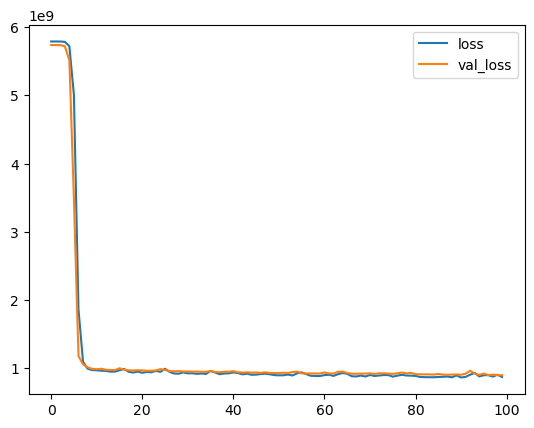

In [26]:
lossdata.plot()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
forecast = model.predict(x_test)

54/54 [==============================] - 0s 940us/step


In [29]:
forecast

array([[69944.125],
       [61637.39 ],
       [62072.12 ],
       ...,
       [65333.684],
       [74536.54 ],
       [62128.492]], dtype=float32)

In [30]:
mean_absolute_error(y_test, forecast)

25771.138852951895

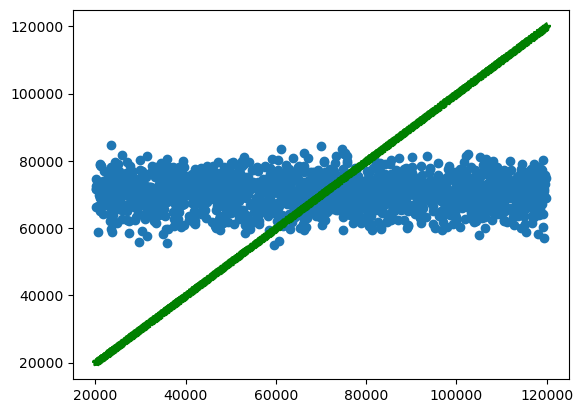

In [31]:
plt.scatter(y_test, forecast)
plt.plot(y_test, y_test, "g-*")